In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn

In [343]:
train_set = pd.read_csv("/Users/max/Documents/Kaggle/all/train.csv")
predict_set = pd.read_csv("/Users/max/Documents/Kaggle/all/test.csv")

In [344]:
train_set.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [345]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [366]:
train_set.shape

(1460, 81)

In [346]:
Quality_str = ["ExterQual", "ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual","GarageQual","GarageCond"]
for i in Quality_str:
    train_set[i] = train_set[i].map({'Gd':'4', 'TA':'3', 'Ex':'5', 'Fa':'2','Po':'1','NA':'0'})
    predict_set[i] = predict_set[i].map({'Gd':'4', 'TA':'3', 'Ex':'5', 'Fa':'2','Po':'1','NA':'0'})

In [348]:
predict_set.shape

(1459, 80)

In [349]:
for i in Quality_str:
    train_set[i] = pd.to_numeric(train_set[i], errors='coerce')
    predict_set[i] =pd.to_numeric(predict_set[i], errors='coerce')

In [351]:
train_set = train_set.fillna(np.mean(train_set))
predict_set = predict_set.fillna(np.mean(predict_set))

In [375]:
train_set_numeric = train_set.select_dtypes(include=[np.number])
predict_set_numeric = predict_set.select_dtypes(include=[np.number])

In [353]:
correlation_train = train_set_numeric.corr()

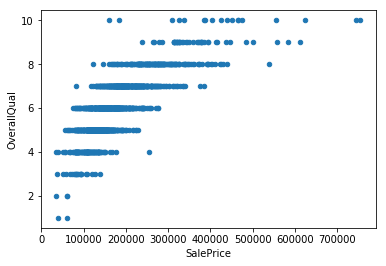

In [354]:
df_int.plot.scatter(x="SalePrice",y="OverallQual")
plt.show()

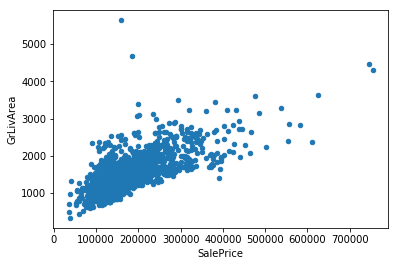

In [355]:
df_int.plot.scatter(x="SalePrice",y="GrLivArea")
plt.show()

In [356]:
correlated_var = correlation_train[correlation_train['SalePrice']>0.35]

In [357]:
correlated_var.index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [377]:
train_set_treated = train_set_numeric[correlated_var.index]
nb_features = train_set_treated.shape[1]
X_train = train_set_treated.iloc[:,0:nb_features-1]
y_train = train_set_treated.loc[:,'SalePrice']

In [378]:
X_predict = predict_set_numeric[correlated_var.index[:nb_features-1]]

In [379]:
X_predict.head(3)

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,5,1961,1961,0.0,3,3.0,468.0,882.0,3,896,896,1,3.0,5,0,1961.0,1.0,730.0
1,6,1958,1958,108.0,3,3.0,923.0,1329.0,3,1329,1329,1,4.0,6,0,1958.0,1.0,312.0
2,5,1997,1998,0.0,3,4.0,791.0,928.0,4,928,1629,2,3.0,6,1,1997.0,2.0,482.0


In [361]:
saleprice = df_correlated['SalePrice']

In [362]:
print(min(saleprice),max(saleprice))

34900 755000


# Modelling

In [296]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [303]:
nb_variable = train_set_numeric.columns.shape[0]

46

In [330]:
X,y = X_train, y_train
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

## Linear Regression

In [114]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [115]:
y_pred = lr.predict(X_test)

In [121]:
r2_score(y_test,y_pred), mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)

(0.6709948873136026, 23788.792718796463, 2172064377.908187)

## SVM

In [128]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
r2_score(y_test,y_pred), mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)

(0.5465652355950545, 32570.57808219178, 2993538584.939726)

## XGBoost

In [383]:
xgboost = ensemble.GradientBoostingRegressor()
xgboost.fit(X_train,y_train)
y_pred = xgboost.predict(X_test)
r2_score(y_test,y_pred), mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)

(0.9498546734631459, 12782.61054909212, 331055273.2750223)

In [384]:
print(xgboost.feature_importances_,X_train.columns)

[0.09802439 0.07076803 0.04226419 0.01931782 0.02334196 0.01858055
 0.11068437 0.0988914  0.00470993 0.08831526 0.17221756 0.02016111
 0.01303134 0.02791433 0.03307674 0.05712029 0.01205369 0.08952704] Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')


In [385]:
final_set = xgboost.predict(X_predict)

In [386]:
X_predict.shape

(1459, 18)

In [387]:
result = pd.DataFrame()
result['Id'] = predict_set["Id"]
result['SalePrice'] = final_set

In [388]:
result.to_csv("/Users/max/Documents/Kaggle/all/submission.csv",index=False)

## Random Forest

In [133]:
rm = ensemble.RandomForestRegressor()
rm.fit(X_train,y_train)
y_pred = rm.predict(X_test)
r2_score(y_test,y_pred), mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)

(0.8636598382590238, 19238.978630136986, 900106403.1430137)

## Neural Net

In [136]:
deep = MLPRegressor()
deep.fit(X_train,y_train)
y_pred = deep.predict(X_test)
r2_score(y_test,y_pred), mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)

/Users/max/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.5236803321811401, 35061.08725154169, 3144622813.0581307)